<a href="https://colab.research.google.com/github/ozturkgizem/ImageImprovement-BGR-HSI-YCbCr-Hist.Eq./blob/main/cv_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2.cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
!git clone https://github.com/ozturkgizem/image-processing-MTM4552.git

Original RGB Image


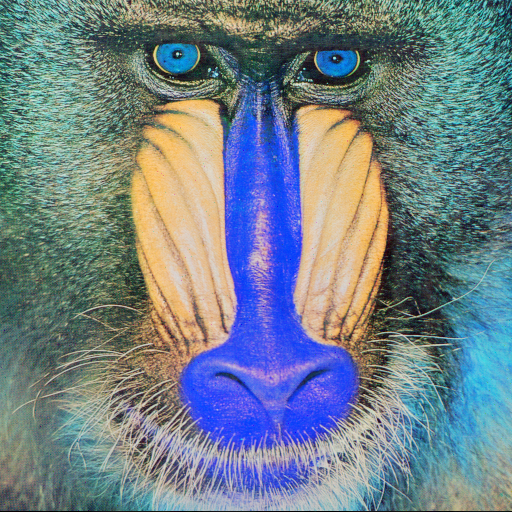

In [ ]:
img = "./image-processing-MTM4552/hw/mandrill.ppm"
RGB_Img = cv2.cvtColor(cv2.imread(img, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB) # input görüntüsünü RGB olarak aldık
print('Original RGB Image')
cv2_imshow(RGB_Img)

RGBTOHSI

In [ ]:
def rgb2hsi(rgbimg):

    rows, cols = rgbimg[:, :, 0].shape
    s = np.zeros((rows, cols), dtype=np.float32)
    i = np.zeros((rows, cols), dtype=np.float32)

    # Normalize
    red = rgbimg[:, :, 0] / 255
    green = rgbimg[:, :, 1] / 255
    blue = rgbimg[:, :, 2] / 255

    h = []

    for r in range(rows):
        for c in range(cols):
            RG = red[r, c]-green[r, c]+0.001  # Red-Green, add a constant to prevent undefined value
            RB = red[r, c]-blue[r, c]+0.001  # Red-Blue
            GB = green[r, c]-blue[r, c]+0.001  # Green-Blue
            theta = np.arccos(np.clip(((0.5*(RG+RB))/(RG**2+RB*GB)**0.5), -1, 1))  # Still in radians
            theta = np.degrees(theta)  # Convert to degrees
            if blue[r, c] <= green[r, c]:
                h.append(theta)
            else:
                h.append(360 - theta)

    h = np.array(h, dtype=np.int64).reshape(rows, cols)  # Convert Hue to NumPy array
    h = ((h - h.min()) * (1/(h.max() - h.min()) * 360))  # Scale h to 0-360
    minRGB = np.minimum(np.minimum(red, green), blue)
    s = 1-((3/(red+green+blue+0.001))*minRGB)  # Add 0.001 to prevent divide by zero
    i = (red+green+blue)/3  # Intensity: 0-1

    return h, s, i

In [ ]:
# CONVERTING RGB TO HSI
h, s, i = rgb2hsi(RGB_Img)

HSI_Img = np.zeros((RGB_Img.shape[0], RGB_Img.shape[1], 3)) # Construct hsi images
HSI_Img[:, :, 0] = h
HSI_Img[:, :, 1] = s
HSI_Img[:, :, 2] = i

RGB to HSI Image


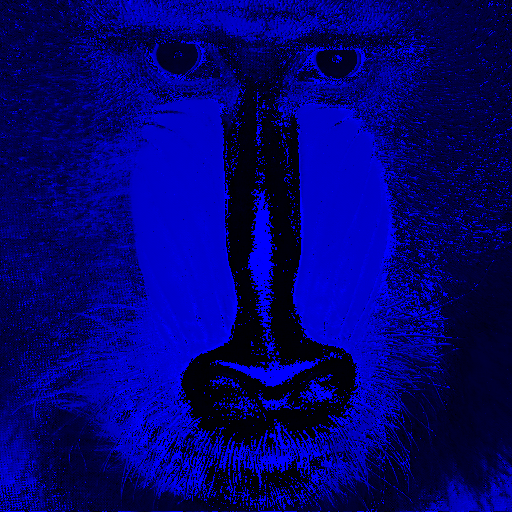

In [ ]:
print('RGB to HSI Image')
cv2_imshow(HSI_Img)

RGB to YCBCR

In [ ]:
def rgb2ycbcr(im):
    xform = np.array([[0.257, 0.504, 0.098],
                      [-0.148, -0.291, 0.439],
                      [0.439, -0.368, -0.071]])
    ycbcr = im.dot(xform.T)
    ycbcr[:, :, [0]] += 16
    ycbcr[:, :, [1, 2]] += 128
    return np.uint8(ycbcr)

# CONVERTING RGB TO YCbCr
YCbCr_Img = rgb2ycbcr(RGB_Img)

RGB to YCbCr Image


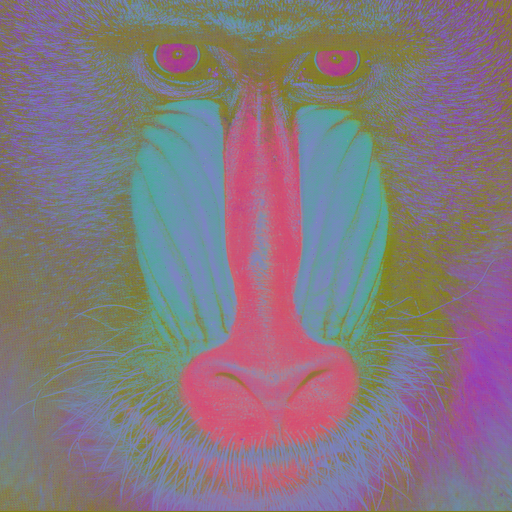

In [ ]:
print('RGB to YCbCr Image')
cv2_imshow(YCbCr_Img)

PSNR

In [ ]:
from math import log10, sqrt
def calculate_psnr(original, converted):
    original = original.astype(np.float32) / 255.
    converted = converted.astype(np.float32) / 255.
    mse = np.mean((original - converted) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr


def rgb2hsi_psnr(img, HSI_img):
    original = img
    converted = HSI_img
    value = calculate_psnr(original, converted)
    print(f"RGB to HSI Img PSNR value is {value} dB")


def rgb2ycrcb_psnr(img, YCrCb_img):
    original = img
    converted = YCrCb_img
    value = calculate_psnr(original, converted)
    print(f"RGB to YCrCb Img PSNR value is {value} dB")

In [ ]:
rgb2hsi_psnr(RGB_Img, HSI_Img)
rgb2ycrcb_psnr(RGB_Img, YCbCr_Img)

RGB to HSI Img PSNR value is 54.061320419329576 dB
RGB to YCrCb Img PSNR value is 60.609255262742934 dB


SNR

In [ ]:
def calculate_snr_ycbcr(original, converted):
    ibg = 0
    signal = ((original + converted) / 2 - ibg).sum()
    f = (0.5 ** 0.5) * ((2 / np.pi) ** -0.5)
    noise = np.abs(original - converted).sum() * f
    snr = signal / noise
    return print(f"RGB to YCBCR Img SNR value is {snr} dB")


def calculate_snr_hsi(original, converted):
    ibg = 0
    signal = ((original + converted) / 2 - ibg).sum()
    f = (0.5 ** 0.5) * ((2 / np.pi) ** -0.5)
    noise = np.abs(original - converted).sum() * f
    snr = signal / noise
    return print(f"RGB to HSI Img SNR value is {snr} dB")

In [ ]:
calculate_snr_hsi(RGB_Img, HSI_Img)
calculate_snr_ycbcr(RGB_Img, YCbCr_Img)

RGB to HSI Img SNR value is 0.8328971442161265 dB
RGB to YCBCR Img SNR value is 0.5651333016938014 dB
